# Descriptive Analysis means getting some business insights from the data
# or answering the questions from the data we have

# before answering to above questions lets handle the missing values

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1676,5.0,Not Graduate,No,7900000.0,29900000.0,6.0,568,5800000.0,13900000.0,15900000.0,8700000.0,Approved
1,1165,0.0,Not Graduate,Yes,9600000.0,34000000.0,12.0,710,23800000.0,10300000.0,38100000.0,7800000.0,Approved
2,193,1.0,Graduate,No,800000.0,2900000.0,8.0,682,2200000.0,1100000.0,2900000.0,700000.0,Approved
3,911,2.0,Graduate,Yes,4900000.0,13100000.0,18.0,754,8200000.0,3300000.0,16500000.0,7200000.0,Approved
4,568,5.0,Graduate,Yes,3000000.0,11100000.0,12.0,441,8500000.0,2500000.0,7300000.0,2000000.0,Rejected


In [6]:
for i in train.columns: #count of null values in training data 
    print(i,train[i].isnull().sum())

loan_id 0
no_of_dependents 11
education 8
self_employed 4
income_annum 5
loan_amount 5
loan_term 5
cibil_score 0
residential_assets_value 4
commercial_assets_value 2
luxury_assets_value 2
bank_asset_value 4
loan_status 0


In [10]:
for i in test.columns: #count of null values in testing data
    print(i,test[i].isnull().sum())

loan_id 0
no_of_dependents 4
education 2
self_employed 4
income_annum 1
loan_amount 2
loan_term 0
cibil_score 0
residential_assets_value 1
commercial_assets_value 2
luxury_assets_value 1
bank_asset_value 2
loan_status 0


## Handling missing values in numerical features

In [11]:
d_numerical_approved={} #imputing considering the class label
for i in train.describe().columns:
    d_numerical_approved[i]={np.nan:train[train["loan_status"]==" Approved"][i].median()}
print(d_numerical_approved)

{'loan_id': {nan: 2192.5}, 'no_of_dependents': {nan: 2.0}, 'income_annum': {nan: 5000000.0}, 'loan_amount': {nan: 14600000.0}, 'loan_term': {nan: 10.0}, 'cibil_score': {nan: 711.0}, 'residential_assets_value': {nan: 5300000.0}, 'commercial_assets_value': {nan: 3700000.0}, 'luxury_assets_value': {nan: 14400000.0}, 'bank_asset_value': {nan: 4500000.0}}


In [12]:
d_numerical_rejected={} #imputing considering the class label
for i in train.describe().columns:
    d_numerical_rejected[i]={np.nan:train[train["loan_status"]==" Rejected"][i].median()}
print(d_numerical_rejected)

{'loan_id': {nan: 2074.0}, 'no_of_dependents': {nan: 2.5}, 'income_annum': {nan: 5100000.0}, 'loan_amount': {nan: 14600000.0}, 'loan_term': {nan: 12.0}, 'cibil_score': {nan: 429.0}, 'residential_assets_value': {nan: 5900000.0}, 'commercial_assets_value': {nan: 3800000.0}, 'luxury_assets_value': {nan: 14900000.0}, 'bank_asset_value': {nan: 4600000.0}}


In [13]:
train[train["loan_status"]==" Approved"]=train[train["loan_status"]==" Approved"].replace(d_numerical_approved)
train[train["loan_status"]==" Rejected"]=train[train["loan_status"]==" Rejected"].replace(d_numerical_rejected)

In [14]:
test[test["loan_status"]==" Approved"]=test[test["loan_status"]==" Approved"].replace(d_numerical_approved)
test[test["loan_status"]==" Rejected"]=test[test["loan_status"]==" Rejected"].replace(d_numerical_rejected)

# Handling missing values in Categorical features

In [16]:
#.mode() returns the series so we need only values so .values gives array and in that at first index value we need so .values[0]
d_categorical_approved={}
for i in train.columns:
    if i not in train.describe().columns and i!="loan_status":
        d_categorical_approved[i]={np.nan:train[train["loan_status"]==" Approved"][i].mode().values[0]}
print(d_categorical_approved)

{'education': {nan: ' Graduate'}, 'self_employed': {nan: ' Yes'}}


In [17]:
d_categorical_rejected={}
for i in train.columns:
    if i not in train.describe().columns and i!="loan_status":
        d_categorical_rejected[i]={np.nan:train[train["loan_status"]==" Rejected"][i].mode().values[0]}
print(d_categorical_rejected)

{'education': {nan: ' Graduate'}, 'self_employed': {nan: ' Yes'}}


In [18]:
train[train["loan_status"]==" Approved"]=train[train["loan_status"]==" Approved"].replace(d_categorical_approved)
train[train["loan_status"]==" Rejected"]=train[train["loan_status"]==" Rejected"].replace(d_categorical_rejected)

In [19]:
test[test["loan_status"]==" Approved"]=test[test["loan_status"]==" Approved"].replace(d_categorical_approved)
test[test["loan_status"]==" Rejected"]=test[test["loan_status"]==" Rejected"].replace(d_categorical_rejected)

In [20]:
for i in train.columns:
    print(i,train[i].isnull().sum())

loan_id 0
no_of_dependents 0
education 0
self_employed 0
income_annum 0
loan_amount 0
loan_term 0
cibil_score 0
residential_assets_value 0
commercial_assets_value 0
luxury_assets_value 0
bank_asset_value 0
loan_status 0


In [21]:
for i in test.columns:
    print(i,test[i].isnull().sum())

loan_id 0
no_of_dependents 0
education 0
self_employed 0
income_annum 0
loan_amount 0
loan_term 0
cibil_score 0
residential_assets_value 0
commercial_assets_value 0
luxury_assets_value 0
bank_asset_value 0
loan_status 0


In [13]:
#we could see there are no null values present in train and test dataset

# Now lets answer the below questions

In [14]:
#### Lets try to answer below questions from the data
#### 1) How many people are graduate and not Graduate who applied for loan
#### 2) people who are graduate ratio of self employed or not and not graduate self employed or not
#### 3) what is the maximum loan term and corresponding amount and minimum loan term and corresponding amount
#### 4) what is the minimum loan amount and corresponding loan term and minimum loan amount and corresponding loan term
#### 5) top 5 individuals whose annual income is more and top 5 individuals whose  annual income is less
#### 6) average number of dependents for graduates and non graduates  
#### 7) combined asset value of graduates and non graduates
#### 8) cibil score of self employed and not self employed and cibil core of Graduate and not graduate
####    cibil score of self employed and graduate , self employed not graduate ,not self employed graduate , 
####      not self employed not graduate
# we can form many questions and can answer from the data

1) How many people are graduate and not Graduate who applied for loan

In [22]:
train["education"].unique()

array([' Not Graduate', ' Graduate'], dtype=object)

In [23]:
print("The numper of Graduate who applied to loan are",train[train["education"]==" Graduate"].shape[0])
print("The numper of Graduate who applied to loan are",train[train["education"]==" Not Graduate"].shape[0])

The numper of Graduate who applied to loan are 1719
The numper of Graduate who applied to loan are 1696


<AxesSubplot:xlabel='education'>

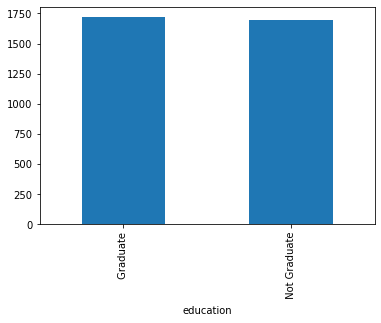

In [24]:
#using Plot
train.groupby("education").count()["loan_id"].plot(kind="bar")

###### Conclusion 
###### There is no major difference both graduates and not graduates are equally applied for loan

2) people who are graduate ratio of self employed or not and not graduate self employed or not

In [25]:
train.groupby(["education","self_employed"]).count()["loan_id"]

education      self_employed
 Graduate       No              859
                Yes             860
 Not Graduate   No              822
                Yes             874
Name: loan_id, dtype: int64

<AxesSubplot:xlabel='education,self_employed'>

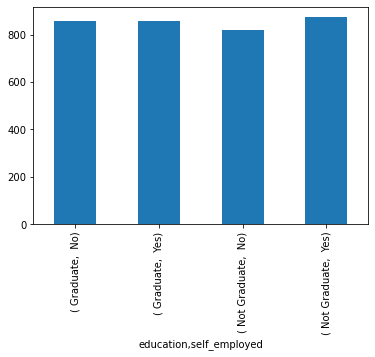

In [26]:
train.groupby(["education","self_employed"]).count()["loan_id"].plot(kind="bar")

###### Conclusion
###### there are more number of graduates with not self employed (obviously they go for jobs) 
###### there are more number of not graduates with self employed (obviously they will do their own business)
###### from the data set there is no major difference but only slight difference

3) what is the maximum loan term and corresponding amount and minimum loan term and corresponding amount
4) what is the minimum loan amount and corresponding loan term and minimum loan amount and corresponding loan term

In [27]:
print("The maximum loan term is {} and it corresponding amount is \n {} \n".format(train["loan_term"].max(),\
                                        train[train["loan_term"]==train["loan_term"].max()]["loan_amount"]))
print("The minimum loan term is {} and it corresponding amount is \n {} \n".format(train["loan_term"].min(),\
                                        train[train["loan_term"]==train["loan_term"].min()]["loan_amount"]))

The maximum loan term is 20.0 and it corresponding amount is 
 12       2000000.0
14      24000000.0
56      17500000.0
69       6400000.0
74      11200000.0
           ...    
3350     3900000.0
3355    10600000.0
3378    16600000.0
3382    21200000.0
3387    14800000.0
Name: loan_amount, Length: 330, dtype: float64 

The minimum loan term is 2.0 and it corresponding amount is 
 9       20600000.0
17      32000000.0
22      18900000.0
25      13100000.0
34      11200000.0
           ...    
3369    25700000.0
3379     9700000.0
3384    20700000.0
3386      800000.0
3403     5900000.0
Name: loan_amount, Length: 313, dtype: float64 



###### we could see there are many loan_amount corresponds to maximum loan term and also many loan_amount corresponds to minimum loan_term
###### lets see any difference in their distributions

In [28]:
temp_df=pd.DataFrame(train[train["loan_term"]==train["loan_term"].max()]["loan_amount"],columns=["loan_amount"])
temp_df["loan_term"]="maximum_loan_term"
temp_df1=pd.DataFrame(train[train["loan_term"]==train["loan_term"].min()]["loan_amount"],columns=["loan_amount"])
temp_df1["loan_term"]="minimum_loan_term"

In [29]:
final_temp_df=pd.concat((temp_df,temp_df1),axis=0)

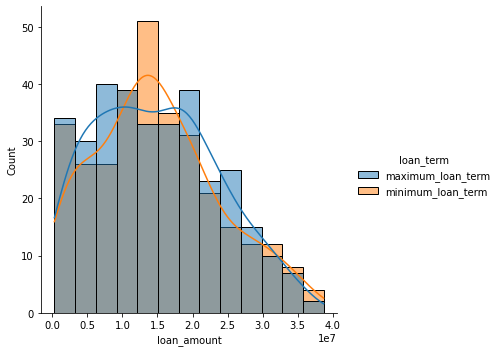

In [30]:
sns.displot(data=final_temp_df,x="loan_amount",hue="loan_term",kde=True)

##### Conclusion
##### there is no major differnce in amounts related to their loan_term

5)  Top 5 individuals whose annual income is more and Top 5 individuals whose  annual income is less

In [31]:
#Top 5 highest salaries
train.sort_values(by=["income_annum"],ascending=False).head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
349,1966,0.0,Not Graduate,No,9900000.0,22300000.0,20.0,613,28400000.0,8900000.0,23600000.0,4900000.0,Approved
1258,1180,5.0,Graduate,No,9900000.0,35700000.0,10.0,392,7900000.0,4300000.0,39200000.0,13000000.0,Rejected
3058,1891,5.0,Graduate,No,9900000.0,24600000.0,2.0,530,24200000.0,12800000.0,20400000.0,13000000.0,Rejected
126,1028,1.0,Not Graduate,No,9900000.0,38700000.0,6.0,670,19400000.0,12600000.0,35800000.0,6500000.0,Approved
1405,301,0.0,Not Graduate,Yes,9900000.0,38200000.0,6.0,573,17200000.0,10000000.0,20100000.0,5900000.0,Approved


In [32]:
# i could see all top 5 highest are having same annual income so lets try to find unique top 5 highest income and corresponding data

In [33]:
# All 5 highest salaries are same lets find top 5 unique salaries and their corresponding data
print("The top 5 salaries are {} ".format(np.sort(train["income_annum"].unique())[-6:-1]))
train[train["income_annum"].isin(np.sort(train["income_annum"].unique())[-6:-1])] 
#it sort in ascending order so we need top 5 so did slicing

The top 5 salaries are [9400000. 9500000. 9600000. 9700000. 9800000.] 


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,1165,0.0,Not Graduate,Yes,9600000.0,34000000.0,12.0,710,23800000.0,10300000.0,38100000.0,7800000.0,Approved
9,440,3.0,Graduate,Yes,9500000.0,20600000.0,2.0,731,13400000.0,3800000.0,20700000.0,9200000.0,Approved
17,3816,0.0,Not Graduate,Yes,9500000.0,32000000.0,2.0,500,8300000.0,9700000.0,24500000.0,5600000.0,Approved
18,3973,2.0,Graduate,Yes,9400000.0,30000000.0,16.0,565,1200000.0,3900000.0,28200000.0,9000000.0,Approved
49,1035,0.0,Graduate,No,9400000.0,33000000.0,4.0,616,15400000.0,5000000.0,25100000.0,7800000.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,2614,0.0,Not Graduate,Yes,9600000.0,19600000.0,12.0,500,21500000.0,700000.0,37600000.0,10900000.0,Rejected
3365,1956,4.0,Not Graduate,No,9500000.0,21300000.0,18.0,353,22900000.0,2300000.0,21400000.0,11100000.0,Rejected
3380,2436,5.0,Graduate,Yes,9600000.0,20600000.0,6.0,456,17300000.0,11000000.0,21700000.0,11600000.0,Rejected
3394,2748,1.0,Graduate,Yes,9700000.0,25500000.0,18.0,741,21900000.0,6200000.0,34800000.0,4900000.0,Approved


In [34]:
#Top 5 lowest salaries
train.sort_values(by=["income_annum"],ascending=True).head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1157,2615,2.0,Not Graduate,Yes,200000.0,500000.0,6.0,746,400000.0,0.0,500000.0,0.0,Approved
146,1069,1.0,Not Graduate,Yes,200000.0,400000.0,6.0,768,300000.0,100000.0,600000.0,0.0,Approved
3374,2825,1.0,Graduate,Yes,200000.0,500000.0,10.0,856,500000.0,200000.0,500000.0,200000.0,Approved
867,1144,1.0,Graduate,Yes,200000.0,400000.0,8.0,569,200000.0,200000.0,700000.0,300000.0,Approved
2910,3731,5.0,Graduate,No,200000.0,700000.0,18.0,707,-100000.0,100000.0,500000.0,200000.0,Approved


In [35]:
# i could see all top 5 lowest are having same annual income so lets try to find unique top 5 lowest income and corresponding data

In [36]:
# All 5 lowest salaries are same lets find top 5 unique salaries and their corresponding data
print("The top 5 salaries are {} ".format(np.sort(train["income_annum"].unique())[0:5]))
train[train["income_annum"].isin(np.sort(train["income_annum"].unique())[0:5])] 
#it sort in ascending order so we need top 5 so did slicing

The top 5 salaries are [200000. 300000. 400000. 500000. 600000.] 


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
5,1559,4.0,Not Graduate,No,300000.0,1000000.0,10.0,819,700000.0,300000.0,900000.0,200000.0,Approved
6,1208,1.0,Not Graduate,Yes,300000.0,600000.0,8.0,816,600000.0,300000.0,1100000.0,200000.0,Approved
12,4200,5.0,Not Graduate,No,600000.0,2000000.0,20.0,811,300000.0,400000.0,1900000.0,600000.0,Approved
45,1062,3.0,Not Graduate,No,300000.0,500000.0,2.0,477,700000.0,200000.0,800000.0,400000.0,Rejected
62,296,1.0,Not Graduate,Yes,300000.0,1000000.0,10.0,431,400000.0,500000.0,900000.0,100000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,380,0.0,Not Graduate,No,500000.0,1800000.0,2.0,531,1300000.0,500000.0,1900000.0,700000.0,Approved
3374,2825,1.0,Graduate,Yes,200000.0,500000.0,10.0,856,500000.0,200000.0,500000.0,200000.0,Approved
3386,1529,5.0,Graduate,Yes,400000.0,800000.0,2.0,759,100000.0,500000.0,1300000.0,300000.0,Approved
3388,1900,1.0,Graduate,No,500000.0,1300000.0,6.0,670,1000000.0,500000.0,1400000.0,700000.0,Approved


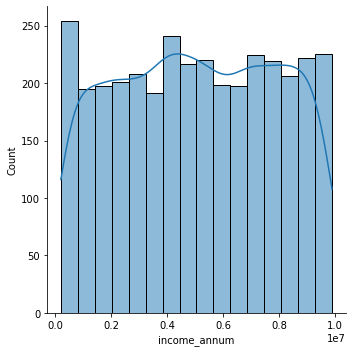

In [37]:
# lets see the salary distribution 
sns.displot(data=train,x="income_annum",kde=True)

###### Conclusion 
###### it is a kind of uniform distribution there are equal number of people from all salary ranges
###### but there are more people from 0 to 10000 alary range from the plot we can see

6) average number of dependents for graduates and non graduates

In [38]:
print("The average number of dependents of graduates are {}".format(train[train["education"]==" Graduate"]["no_of_dependents"].median()))
print("The average number of dependents of graduates are {}".format(train[train["education"]==" Not Graduate"]["no_of_dependents"].median()))

The average number of dependents of graduates are 2.0
The average number of dependents of graduates are 2.0


###### Conclusion
###### There are equal number of dependents for Graduates and not grafuates on an average

7) combined asset value of graduates and non graduates

In [40]:
train.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [41]:
#lets create a column that is combination of all asset values that individual hold
train["Combined_asset_value"]=train["residential_assets_value"]+train["commercial_assets_value"]+train["luxury_assets_value"]+train["bank_asset_value"]
test["Combined_asset_value"]=test["residential_assets_value"]+test["commercial_assets_value"]+test["luxury_assets_value"]+test["bank_asset_value"]

<AxesSubplot:xlabel='education'>

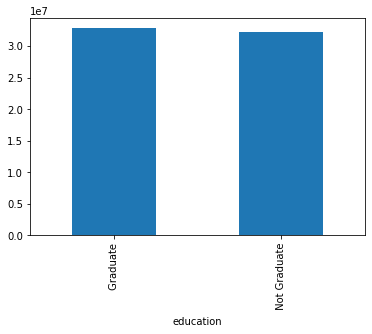

In [42]:
train.groupby("education").mean()["Combined_asset_value"].plot(kind="bar")

##### Conclusion 
##### both graduate and non graduate asset values are equal

8) cibil score of self employed and not self employed and cibil core of Graduate and not graduate

<AxesSubplot:xlabel='education'>

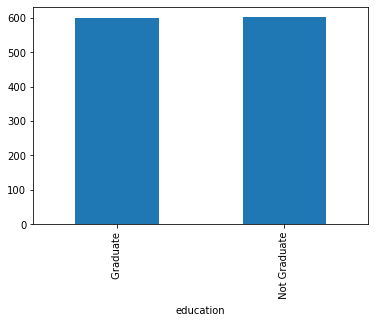

In [43]:
train.groupby("education").mean()["cibil_score"].plot(kind="bar")

<AxesSubplot:xlabel='self_employed'>

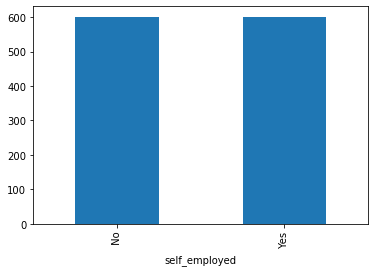

In [44]:
train.groupby("self_employed").mean()["cibil_score"].plot(kind="bar")

<AxesSubplot:xlabel='education,self_employed'>

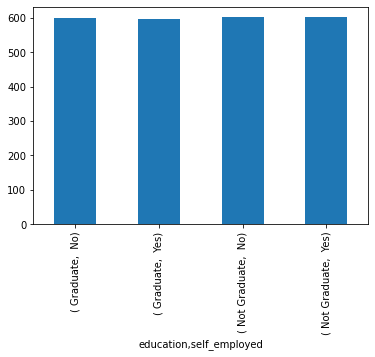

In [45]:
train.groupby(["education","self_employed"]).mean()["cibil_score"].plot(kind="bar")

###### COnclusion
###### there is no major difference in cibil_score_also with different criteria

In [46]:
#lets write the train to our train.csv file Since we handled null values here
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)